In [3]:
import gym                                        #جعبه ابزار OpenAI GYM (برای ساخت محیط) 
import numpy as np                                #کتابخانه های ریاضی پایتون برای کار با ماتریس ها
import torch                                      #کتابخانه ترچ برای کار با شبکه های عصبی عمیق
from torch import nn                              #کلاس شبکه های عصبی عمیق از کتابخانه پایترچ
import matplotlib.pyplot as plt                   #کتابخانه برای رسم نمودار

In [4]:
import gym
import numpy as np

class GameEnv:
    def __init__(self, game_name):
        self.__env = gym.make(game_name)
    
    def get_init_params(self):
        return self.__env.observation_space.shape, self.__env.action_space.n

    def env_reset(self):
        return self.__env.reset()
    
    def env_step(self, action):
        return self.__env.step(action)
    
    def env_render(self):
        self.__env.render()

In [5]:
import torch.nn as nn
import torch.nn.functional as F

class Actor(nn.Module):
    def __init__(self, actions_dim, states_dim):
        super().__init__()
        self.fc1 = nn.Linear(states_dim, 10)
        self.fc2 = nn.Linear(10, 50)
        self.fc3 = nn.Linear(50, actions_dim)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.softmax(x)


class Critic(nn.Module):
    def __init__(self, states_dim):
        super().__init__()
        self.fc1 = nn.Linear(states_dim, 20)
        self.fc2 = nn.Linear(20, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [6]:

import torch.optim as optim
from torch import Tensor, distributions
import numpy as np
import matplotlib.pyplot as plt

----------- Start 1 train epoch -----------


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  from ipykernel import kernelapp as app


----------- At the end of 1 epoch reward = -193.42811337471042 -----------
----------- Start 2 train epoch -----------
----------- At the end of 2 epoch reward = -199.32217673669683 -----------
----------- Start 3 train epoch -----------
----------- At the end of 3 epoch reward = -197.15140082132785 -----------
----------- Start 4 train epoch -----------
----------- At the end of 4 epoch reward = -199.37002886854904 -----------
----------- Start 5 train epoch -----------
----------- At the end of 5 epoch reward = -198.17472751861595 -----------
----------- Start 6 train epoch -----------
----------- At the end of 6 epoch reward = -196.84616687968196 -----------
----------- Start 7 train epoch -----------
----------- At the end of 7 epoch reward = -199.59452378852524 -----------
----------- Start 8 train epoch -----------
----------- At the end of 8 epoch reward = -198.28134958945836 -----------
----------- Start 9 train epoch -----------
----------- At the end of 9 epoch reward = -197.

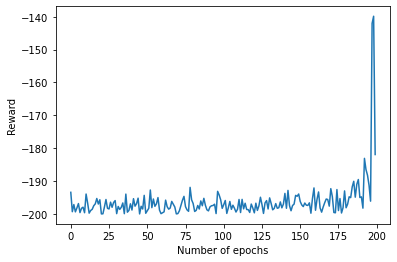

NoSuchDisplayException: ignored

In [7]:
class GameEmulator:
  def __init__(self, epochs, default_reward, reward_func):
    self.epochs = epochs
    self.max_reward = default_reward
    self.overall_reward = []
    self.game = GameEnv("MountainCar-v0")
    states_dim, actions_dim = self.game.get_init_params()
    self.actor = Actor(actions_dim, states_dim[0])
    self.critic = Critic(states_dim[0])
    self.actor_optim = optim.Adam(params=self.actor.parameters(), lr=0.0009)
    self.critic_optim = optim.Adam(params=self.critic.parameters(), lr=0.009)
    self.reward_func = reward_func

  def get_distributed_action(self, state):
    softmax_probs = self.actor(Tensor(state))
    d = distributions.Categorical(probs=softmax_probs)
    return d.sample(), d

  def A_func(self, done, state, prev_state, gamma=0.98):
    return (1 - done) * gamma * self.critic(Tensor(state)) - self.critic(Tensor(prev_state))

  def set_best(self, last_step=-3):
    if self.max_reward < np.mean(self.overall_reward[last_step:]):
      self.max_reward = np.mean(self.overall_reward[last_step:])

  def train_model(self, final_reward=None):
    self.actor.train()
    for i in range(self.epochs):
      print(f"----------- Start {i + 1} train epoch -----------")
      done = False
      epoch_reward = 0
      prev_state = self.game.env_reset()
      while not done:
        action, distribution = self.get_distributed_action(prev_state)
        state, reward, done, _ = self.game.env_step(action.detach().data.numpy())
        reward = reward + self.reward_func(state, prev_state)
        A = reward + self.A_func(done, state, prev_state)
        prev_state = state
        critic_loss = A.pow(2).mean()
        self.critic_optim.zero_grad()
        critic_loss.backward()
        self.critic_optim.step()
        actor_loss = -distribution.log_prob(action) * A.detach()
        self.actor_optim.zero_grad()
        actor_loss.backward()
        self.actor_optim.step()
        epoch_reward += reward
      self.overall_reward.append(epoch_reward)
      self.set_best()
      if final_reward and epoch_reward > final_reward:
        print(f"----------- Model achieve the maximum best result - {epoch_reward} -----------")
        return

      print(f"----------- At the end of {i + 1} epoch reward = {epoch_reward} -----------")
  def play(self):
    self.actor.eval()
    while True:
      state = self.game.env_reset()
      done = False
      while not done:
        action, _ = self.get_distributed_action(state)
        state, _, done, _ = self.game.env_step(action.detach().data.numpy())
        self.game.env_render()
  def plot(self):
    plt.plot([i for i,v in enumerate(self.overall_reward)], self.overall_reward)
    plt.xlabel("Number of epochs")
    plt.ylabel("Reward")
    plt.show()
if __name__ == "__main__":
  def reward_func(s2, s1, accelerator=315):
    return accelerator * (abs(s2[1]) - abs(s1[1]))
  game = GameEmulator(200, -200, reward_func)
  game.train_model()
  game.plot()
  game.play()

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class Actor(nn.Module):
    def __init__(self, actions_dim, states_dim):
        super().__init__()
        self.fc1 = nn.Linear(states_dim, 10)
        self.fc2 = nn.Linear(10, 50)
        self.fc3 = nn.Linear(50, actions_dim)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.softmax(x)


class Critic(nn.Module):
    def __init__(self, states_dim):
        super().__init__()
        self.fc1 = nn.Linear(states_dim, 20)
        self.fc2 = nn.Linear(20, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

----------- Start 1 train epoch -----------


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  from ipykernel import kernelapp as app


----------- At the end of 1 epoch reward = -193.74606311403898 -----------
----------- Start 2 train epoch -----------
----------- At the end of 2 epoch reward = -199.25545857197753 -----------
----------- Start 3 train epoch -----------
----------- At the end of 3 epoch reward = -192.61295427465583 -----------
----------- Start 4 train epoch -----------
----------- At the end of 4 epoch reward = -199.7535610205468 -----------
----------- Start 5 train epoch -----------
----------- At the end of 5 epoch reward = -197.91777999717544 -----------
----------- Start 6 train epoch -----------
----------- At the end of 6 epoch reward = -196.66686326351498 -----------
----------- Start 7 train epoch -----------
----------- At the end of 7 epoch reward = -198.42270126247564 -----------
----------- Start 8 train epoch -----------
----------- At the end of 8 epoch reward = -199.37524365184075 -----------
----------- Start 9 train epoch -----------
----------- At the end of 9 epoch reward = -199.0

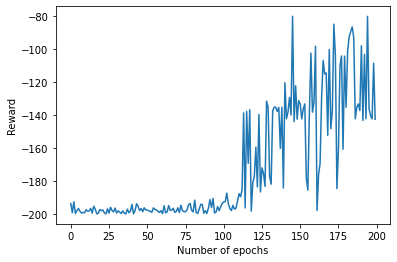

NameError: ignored

In [8]:
class GameEmulator:
  def __init__(self, epochs, default_reward, reward_func):
    self.epochs = epochs
    self.max_reward = default_reward
    self.overall_reward = []
    self.game = GameEnv("MountainCar-v0")
    states_dim, actions_dim = self.game.get_init_params()
    self.actor = Actor(actions_dim, states_dim[0])
    self.critic = Critic(states_dim[0])
    self.actor_optim = optim.Adam(params=self.actor.parameters(), lr=0.0009)
    self.critic_optim = optim.Adam(params=self.critic.parameters(), lr=0.009)
    self.reward_func = reward_func

  def get_distributed_action(self, state):
    softmax_probs = self.actor(Tensor(state))
    d = distributions.Categorical(probs=softmax_probs)
    return d.sample(), d

  def A_func(self, done, state, prev_state, gamma=0.9):
    return (1 - done) * gamma * self.critic(Tensor(state)) - self.critic(Tensor(prev_state))

  def set_best(self, last_step=-3):
    if self.max_reward < np.mean(self.overall_reward[last_step:]):
      self.max_reward = np.mean(self.overall_reward[last_step:])

  def train_model(self, final_reward=None):
    self.actor.train()
    for i in range(self.epochs):
      print(f"----------- Start {i + 1} train epoch -----------")
      done = False
      epoch_reward = 0
      prev_state = self.game.env_reset()
      while not done:
        action, distribution = self.get_distributed_action(prev_state)
        state, reward, done, _ = self.game.env_step(action.detach().data.numpy())
        reward = reward + self.reward_func(state, prev_state)
        A = reward + self.A_func(done, state, prev_state)
        prev_state = state
        critic_loss = A.pow(2).mean()
        self.critic_optim.zero_grad()
        critic_loss.backward()
        self.critic_optim.step()
        actor_loss = -distribution.log_prob(action) * A.detach()
        self.actor_optim.zero_grad()
        actor_loss.backward()
        self.actor_optim.step()
        epoch_reward += reward
      self.overall_reward.append(epoch_reward)
      self.set_best()
      if final_reward and epoch_reward > final_reward:
        print(f"----------- Model achieve the maximum best result - {epoch_reward} -----------")
        return

      print(f"----------- At the end of {i + 1} epoch reward = {epoch_reward} -----------")
  def play(self):
    self.actor.eval()
    while True:
      state = self.game.env_reset()
      done = False
      while not done:
        action, _ = self.get_distributed_action(state)
        state, _, done, _ = self.game.env_step(action.detach().data.numpy())
        self.game.env_render()
  def plot(self):
    plt.plot([i for i,v in enumerate(self.overall_reward)], self.overall_reward)
    plt.xlabel("Number of epochs")
    plt.ylabel("Reward")
    plt.show()
if __name__ == "__main__":
  def reward_func(s2, s1, accelerator=315):
    return accelerator * (abs(s2[1]) - abs(s1[1]))
  game = GameEmulator(200, -200, reward_func)
  game.train_model()
  game.plot()
  game.play()

----------- Start 1 train epoch -----------


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  from ipykernel import kernelapp as app


----------- At the end of 1 epoch reward = -199.1919876407454 -----------
----------- Start 2 train epoch -----------
----------- At the end of 2 epoch reward = -199.26762135688415 -----------
----------- Start 3 train epoch -----------
----------- At the end of 3 epoch reward = -197.69377561793527 -----------
----------- Start 4 train epoch -----------
----------- At the end of 4 epoch reward = -197.2172531145669 -----------
----------- Start 5 train epoch -----------
----------- At the end of 5 epoch reward = -194.5513021370987 -----------
----------- Start 6 train epoch -----------
----------- At the end of 6 epoch reward = -196.4668244369354 -----------
----------- Start 7 train epoch -----------
----------- At the end of 7 epoch reward = -199.48635594696427 -----------
----------- Start 8 train epoch -----------
----------- At the end of 8 epoch reward = -198.4576120150436 -----------
----------- Start 9 train epoch -----------
----------- At the end of 9 epoch reward = -194.26534

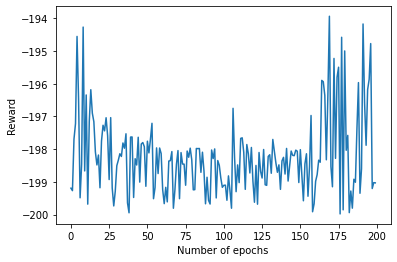

NameError: ignored

In [9]:
class GameEmulator:
  def __init__(self, epochs, default_reward, reward_func):
    self.epochs = epochs
    self.max_reward = default_reward
    self.overall_reward = []
    self.game = GameEnv("MountainCar-v0")
    states_dim, actions_dim = self.game.get_init_params()
    self.actor = Actor(actions_dim, states_dim[0])
    self.critic = Critic(states_dim[0])
    self.actor_optim = optim.Adam(params=self.actor.parameters(), lr=0.0009)
    self.critic_optim = optim.Adam(params=self.critic.parameters(), lr=0.009)
    self.reward_func = reward_func

  def get_distributed_action(self, state):
    softmax_probs = self.actor(Tensor(state))
    d = distributions.Categorical(probs=softmax_probs)
    return d.sample(), d

  def A_func(self, done, state, prev_state, gamma=0.8):
    return (1 - done) * gamma * self.critic(Tensor(state)) - self.critic(Tensor(prev_state))

  def set_best(self, last_step=-3):
    if self.max_reward < np.mean(self.overall_reward[last_step:]):
      self.max_reward = np.mean(self.overall_reward[last_step:])

  def train_model(self, final_reward=None):
    self.actor.train()
    for i in range(self.epochs):
      print(f"----------- Start {i + 1} train epoch -----------")
      done = False
      epoch_reward = 0
      prev_state = self.game.env_reset()
      while not done:
        action, distribution = self.get_distributed_action(prev_state)
        state, reward, done, _ = self.game.env_step(action.detach().data.numpy())
        reward = reward + self.reward_func(state, prev_state)
        A = reward + self.A_func(done, state, prev_state)
        prev_state = state
        critic_loss = A.pow(2).mean()
        self.critic_optim.zero_grad()
        critic_loss.backward()
        self.critic_optim.step()
        actor_loss = -distribution.log_prob(action) * A.detach()
        self.actor_optim.zero_grad()
        actor_loss.backward()
        self.actor_optim.step()
        epoch_reward += reward
      self.overall_reward.append(epoch_reward)
      self.set_best()
      if final_reward and epoch_reward > final_reward:
        print(f"----------- Model achieve the maximum best result - {epoch_reward} -----------")
        return

      print(f"----------- At the end of {i + 1} epoch reward = {epoch_reward} -----------")
  def play(self):
    self.actor.eval()
    while True:
      state = self.game.env_reset()
      done = False
      while not done:
        action, _ = self.get_distributed_action(state)
        state, _, done, _ = self.game.env_step(action.detach().data.numpy())
        self.game.env_render()
  def plot(self):
    plt.plot([i for i,v in enumerate(self.overall_reward)], self.overall_reward)
    plt.xlabel("Number of epochs")
    plt.ylabel("Reward")
    plt.show()
if __name__ == "__main__":
  def reward_func(s2, s1, accelerator=315):
    return accelerator * (abs(s2[1]) - abs(s1[1]))
  game = GameEmulator(200, -200, reward_func)
  game.train_model()
  game.plot()
  game.play()

----------- Start 1 train epoch -----------


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  from ipykernel import kernelapp as app


----------- At the end of 1 epoch reward = -197.7516229410616 -----------
----------- Start 2 train epoch -----------
----------- At the end of 2 epoch reward = -196.2201276923239 -----------
----------- Start 3 train epoch -----------
----------- At the end of 3 epoch reward = -197.91373281821944 -----------
----------- Start 4 train epoch -----------
----------- At the end of 4 epoch reward = -199.6119688321359 -----------
----------- Start 5 train epoch -----------
----------- At the end of 5 epoch reward = -194.69688934199473 -----------
----------- Start 6 train epoch -----------
----------- At the end of 6 epoch reward = -195.91446896201376 -----------
----------- Start 7 train epoch -----------
----------- At the end of 7 epoch reward = -198.36985036265546 -----------
----------- Start 8 train epoch -----------
----------- At the end of 8 epoch reward = -196.24164450415935 -----------
----------- Start 9 train epoch -----------
----------- At the end of 9 epoch reward = -198.209

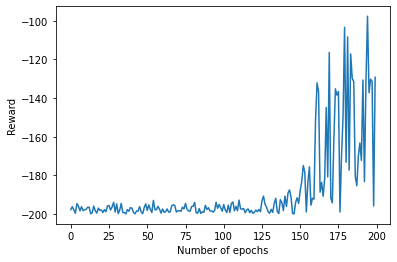

NameError: ignored

In [ ]:
class GameEmulator:
  def __init__(self, epochs, default_reward, reward_func):
    self.epochs = epochs
    self.max_reward = default_reward
    self.overall_reward = []
    self.game = GameEnv("MountainCar-v0")
    states_dim, actions_dim = self.game.get_init_params()
    self.actor = Actor(actions_dim, states_dim[0])
    self.critic = Critic(states_dim[0])
    self.actor_optim = optim.Adam(params=self.actor.parameters(), lr=0.0009)
    self.critic_optim = optim.Adam(params=self.critic.parameters(), lr=0.0009)
    self.reward_func = reward_func

  def get_distributed_action(self, state):
    softmax_probs = self.actor(Tensor(state))
    d = distributions.Categorical(probs=softmax_probs)
    return d.sample(), d

  def A_func(self, done, state, prev_state, gamma=0.98):
    return (1 - done) * gamma * self.critic(Tensor(state)) - self.critic(Tensor(prev_state))

  def set_best(self, last_step=-3):
    if self.max_reward < np.mean(self.overall_reward[last_step:]):
      self.max_reward = np.mean(self.overall_reward[last_step:])

  def train_model(self, final_reward=None):
    self.actor.train()
    for i in range(self.epochs):
      print(f"----------- Start {i + 1} train epoch -----------")
      done = False
      epoch_reward = 0
      prev_state = self.game.env_reset()
      while not done:
        action, distribution = self.get_distributed_action(prev_state)
        state, reward, done, _ = self.game.env_step(action.detach().data.numpy())
        reward = reward + self.reward_func(state, prev_state)
        A = reward + self.A_func(done, state, prev_state)
        prev_state = state
        critic_loss = A.pow(2).mean()
        self.critic_optim.zero_grad()
        critic_loss.backward()
        self.critic_optim.step()
        actor_loss = -distribution.log_prob(action) * A.detach()
        self.actor_optim.zero_grad()
        actor_loss.backward()
        self.actor_optim.step()
        epoch_reward += reward
      self.overall_reward.append(epoch_reward)
      self.set_best()
      if final_reward and epoch_reward > final_reward:
        print(f"----------- Model achieve the maximum best result - {epoch_reward} -----------")
        return

      print(f"----------- At the end of {i + 1} epoch reward = {epoch_reward} -----------")
  def play(self):
    self.actor.eval()
    while True:
      state = self.game.env_reset()
      done = False
      while not done:
        action, _ = self.get_distributed_action(state)
        state, _, done, _ = self.game.env_step(action.detach().data.numpy())
        self.game.env_render()
  def plot(self):
    plt.plot([i for i,v in enumerate(self.overall_reward)], self.overall_reward)
    plt.xlabel("Number of epochs")
    plt.ylabel("Reward")
    plt.show()
if __name__ == "__main__":
  def reward_func(s2, s1, accelerator=315):
    return accelerator * (abs(s2[1]) - abs(s1[1]))
  game = GameEmulator(200, -200, reward_func)
  game.train_model()
  game.plot()
  game.play()

----------- Start 1 train epoch -----------


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  from ipykernel import kernelapp as app


----------- At the end of 1 epoch reward = -197.89757079406982 -----------
----------- Start 2 train epoch -----------
----------- At the end of 2 epoch reward = -199.1381212008069 -----------
----------- Start 3 train epoch -----------
----------- At the end of 3 epoch reward = -195.5784794514522 -----------
----------- Start 4 train epoch -----------
----------- At the end of 4 epoch reward = -199.43071578661258 -----------
----------- Start 5 train epoch -----------
----------- At the end of 5 epoch reward = -197.52218884472552 -----------
----------- Start 6 train epoch -----------
----------- At the end of 6 epoch reward = -198.81036397531045 -----------
----------- Start 7 train epoch -----------
----------- At the end of 7 epoch reward = -196.84801882776904 -----------
----------- Start 8 train epoch -----------
----------- At the end of 8 epoch reward = -195.57945599502432 -----------
----------- Start 9 train epoch -----------
----------- At the end of 9 epoch reward = -197.76

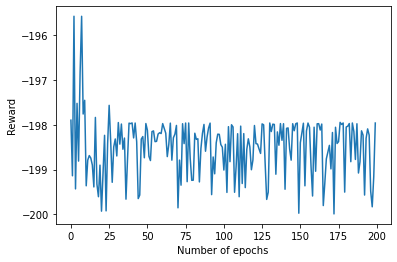

NameError: ignored

In [10]:
class GameEmulator:
  def __init__(self, epochs, default_reward, reward_func):
    self.epochs = epochs
    self.max_reward = default_reward
    self.overall_reward = []
    self.game = GameEnv("MountainCar-v0")
    states_dim, actions_dim = self.game.get_init_params()
    self.actor = Actor(actions_dim, states_dim[0])
    self.critic = Critic(states_dim[0])
    self.actor_optim = optim.Adam(params=self.actor.parameters(), lr=0.0009)
    self.critic_optim = optim.Adam(params=self.critic.parameters(), lr=0.009)
    self.reward_func = reward_func

  def get_distributed_action(self, state):
    softmax_probs = self.actor(Tensor(state))
    d = distributions.Categorical(probs=softmax_probs)
    return d.sample(), d

  def A_func(self, done, state, prev_state, gamma=0.7):
    return (1 - done) * gamma * self.critic(Tensor(state)) - self.critic(Tensor(prev_state))

  def set_best(self, last_step=-3):
    if self.max_reward < np.mean(self.overall_reward[last_step:]):
      self.max_reward = np.mean(self.overall_reward[last_step:])

  def train_model(self, final_reward=None):
    self.actor.train()
    for i in range(self.epochs):
      print(f"----------- Start {i + 1} train epoch -----------")
      done = False
      epoch_reward = 0
      prev_state = self.game.env_reset()
      while not done:
        action, distribution = self.get_distributed_action(prev_state)
        state, reward, done, _ = self.game.env_step(action.detach().data.numpy())
        reward = reward + self.reward_func(state, prev_state)
        A = reward + self.A_func(done, state, prev_state)
        prev_state = state
        critic_loss = A.pow(2).mean()
        self.critic_optim.zero_grad()
        critic_loss.backward()
        self.critic_optim.step()
        actor_loss = -distribution.log_prob(action) * A.detach()
        self.actor_optim.zero_grad()
        actor_loss.backward()
        self.actor_optim.step()
        epoch_reward += reward
      self.overall_reward.append(epoch_reward)
      self.set_best()
      if final_reward and epoch_reward > final_reward:
        print(f"----------- Model achieve the maximum best result - {epoch_reward} -----------")
        return

      print(f"----------- At the end of {i + 1} epoch reward = {epoch_reward} -----------")
  def play(self):
    self.actor.eval()
    while True:
      state = self.game.env_reset()
      done = False
      while not done:
        action, _ = self.get_distributed_action(state)
        state, _, done, _ = self.game.env_step(action.detach().data.numpy())
        self.game.env_render()
  def plot(self):
    plt.plot([i for i,v in enumerate(self.overall_reward)], self.overall_reward)
    plt.xlabel("Number of epochs")
    plt.ylabel("Reward")
    plt.show()
if __name__ == "__main__":
  def reward_func(s2, s1, accelerator=315):
    return accelerator * (abs(s2[1]) - abs(s1[1]))
  game = GameEmulator(200, -200, reward_func)
  game.train_model()
  game.plot()
  game.play()

----------- Start 1 train epoch -----------


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  from ipykernel import kernelapp as app


----------- At the end of 1 epoch reward = -197.32698565607018 -----------
----------- Start 2 train epoch -----------
----------- At the end of 2 epoch reward = -197.99948586502566 -----------
----------- Start 3 train epoch -----------
----------- At the end of 3 epoch reward = -197.74964224725662 -----------
----------- Start 4 train epoch -----------
----------- At the end of 4 epoch reward = -198.0170412906602 -----------
----------- Start 5 train epoch -----------
----------- At the end of 5 epoch reward = -199.7710922325915 -----------
----------- Start 6 train epoch -----------
----------- At the end of 6 epoch reward = -196.94907105489906 -----------
----------- Start 7 train epoch -----------
----------- At the end of 7 epoch reward = -198.09129840567212 -----------
----------- Start 8 train epoch -----------
----------- At the end of 8 epoch reward = -197.49195666675715 -----------
----------- Start 9 train epoch -----------
----------- At the end of 9 epoch reward = -198.67

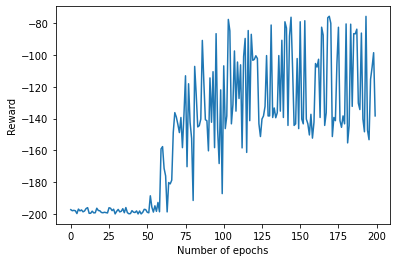

NameError: ignored

In [ ]:
class GameEmulator:
  def __init__(self, epochs, default_reward, reward_func):
    self.epochs = epochs
    self.max_reward = default_reward
    self.overall_reward = []
    self.game = GameEnv("MountainCar-v0")
    states_dim, actions_dim = self.game.get_init_params()
    self.actor = Actor(actions_dim, states_dim[0])
    self.critic = Critic(states_dim[0])
    self.actor_optim = optim.Adam(params=self.actor.parameters(), lr=0.0009)
    self.critic_optim = optim.Adam(params=self.critic.parameters(), lr=0.009)
    self.reward_func = reward_func

  def get_distributed_action(self, state):
    softmax_probs = self.actor(Tensor(state))
    d = distributions.Categorical(probs=softmax_probs)
    return d.sample(), d

  def A_func(self, done, state, prev_state, gamma=0.6):
    return (1 - done) * gamma * self.critic(Tensor(state)) - self.critic(Tensor(prev_state))

  def set_best(self, last_step=-3):
    if self.max_reward < np.mean(self.overall_reward[last_step:]):
      self.max_reward = np.mean(self.overall_reward[last_step:])

  def train_model(self, final_reward=None):
    self.actor.train()
    for i in range(self.epochs):
      print(f"----------- Start {i + 1} train epoch -----------")
      done = False
      epoch_reward = 0
      prev_state = self.game.env_reset()
      while not done:
        action, distribution = self.get_distributed_action(prev_state)
        state, reward, done, _ = self.game.env_step(action.detach().data.numpy())
        reward = reward + self.reward_func(state, prev_state)
        A = reward + self.A_func(done, state, prev_state)
        prev_state = state
        critic_loss = A.pow(2).mean()
        self.critic_optim.zero_grad()
        critic_loss.backward()
        self.critic_optim.step()
        actor_loss = -distribution.log_prob(action) * A.detach()
        self.actor_optim.zero_grad()
        actor_loss.backward()
        self.actor_optim.step()
        epoch_reward += reward
      self.overall_reward.append(epoch_reward)
      self.set_best()
      if final_reward and epoch_reward > final_reward:
        print(f"----------- Model achieve the maximum best result - {epoch_reward} -----------")
        return

      print(f"----------- At the end of {i + 1} epoch reward = {epoch_reward} -----------")
  def play(self):
    self.actor.eval()
    while True:
      state = self.game.env_reset()
      done = False
      while not done:
        action, _ = self.get_distributed_action(state)
        state, _, done, _ = self.game.env_step(action.detach().data.numpy())
        self.game.env_render()
  def plot(self):
    plt.plot([i for i,v in enumerate(self.overall_reward)], self.overall_reward)
    plt.xlabel("Number of epochs")
    plt.ylabel("Reward")
    plt.show()
if __name__ == "__main__":
  def reward_func(s2, s1, accelerator=315):
    return accelerator * (abs(s2[1]) - abs(s1[1]))
  game = GameEmulator(200, -200, reward_func)
  game.train_model()
  game.plot()
  game.play()

----------- Start 1 train epoch -----------


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  from ipykernel import kernelapp as app


----------- At the end of 1 epoch reward = -199.14113256236223 -----------
----------- Start 2 train epoch -----------
----------- At the end of 2 epoch reward = -194.908170378361 -----------
----------- Start 3 train epoch -----------
----------- At the end of 3 epoch reward = -198.00192442163134 -----------
----------- Start 4 train epoch -----------
----------- At the end of 4 epoch reward = -199.96635130827522 -----------
----------- Start 5 train epoch -----------
----------- At the end of 5 epoch reward = -197.1371453958385 -----------
----------- Start 6 train epoch -----------
----------- At the end of 6 epoch reward = -199.82271854650554 -----------
----------- Start 7 train epoch -----------
----------- At the end of 7 epoch reward = -196.46901933946904 -----------
----------- Start 8 train epoch -----------
----------- At the end of 8 epoch reward = -197.51949549065273 -----------
----------- Start 9 train epoch -----------
----------- At the end of 9 epoch reward = -198.980

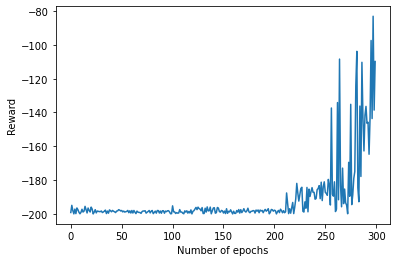

NoSuchDisplayException: ignored

In [ ]:
class GameEmulator:
  def __init__(self, epochs, default_reward, reward_func):
    self.epochs = epochs
    self.max_reward = default_reward
    self.overall_reward = []
    self.game = GameEnv("MountainCar-v0")
    states_dim, actions_dim = self.game.get_init_params()
    self.actor = Actor(actions_dim, states_dim[0])
    self.critic = Critic(states_dim[0])
    self.actor_optim = optim.Adam(params=self.actor.parameters(), lr=0.0009)
    self.critic_optim = optim.Adam(params=self.critic.parameters(), lr=0.0009)
    self.reward_func = reward_func

  def get_distributed_action(self, state):
    softmax_probs = self.actor(Tensor(state))
    d = distributions.Categorical(probs=softmax_probs)
    return d.sample(), d

  def A_func(self, done, state, prev_state, gamma=0.98):
    return (1 - done) * gamma * self.critic(Tensor(state)) - self.critic(Tensor(prev_state))

  def set_best(self, last_step=-3):
    if self.max_reward < np.mean(self.overall_reward[last_step:]):
      self.max_reward = np.mean(self.overall_reward[last_step:])

  def train_model(self, final_reward=None):
    self.actor.train()
    for i in range(self.epochs):
      print(f"----------- Start {i + 1} train epoch -----------")
      done = False
      epoch_reward = 0
      prev_state = self.game.env_reset()
      while not done:
        action, distribution = self.get_distributed_action(prev_state)
        state, reward, done, _ = self.game.env_step(action.detach().data.numpy())
        reward = reward + self.reward_func(state, prev_state)
        A = reward + self.A_func(done, state, prev_state)
        prev_state = state
        critic_loss = A.pow(2).mean()
        self.critic_optim.zero_grad()
        critic_loss.backward()
        self.critic_optim.step()
        actor_loss = -distribution.log_prob(action) * A.detach()
        self.actor_optim.zero_grad()
        actor_loss.backward()
        self.actor_optim.step()
        epoch_reward += reward
      self.overall_reward.append(epoch_reward)
      self.set_best()
      if final_reward and epoch_reward > final_reward:
        print(f"----------- Model achieve the maximum best result - {epoch_reward} -----------")
        return

      print(f"----------- At the end of {i + 1} epoch reward = {epoch_reward} -----------")
  def play(self):
    self.actor.eval()
    while True:
      state = self.game.env_reset()
      done = False
      while not done:
        action, _ = self.get_distributed_action(state)
        state, _, done, _ = self.game.env_step(action.detach().data.numpy())
        self.game.env_render()
  def plot(self):
    plt.plot([i for i,v in enumerate(self.overall_reward)], self.overall_reward)
    plt.xlabel("Number of epochs")
    plt.ylabel("Reward")
    plt.show()
if __name__ == "__main__":
  def reward_func(s2, s1, accelerator=315):
    return accelerator * (abs(s2[1]) - abs(s1[1]))
  game = GameEmulator(300, -200, reward_func)
  game.train_model()
  game.plot()
  game.play()

----------- Start 1 train epoch -----------


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  from ipykernel import kernelapp as app


----------- At the end of 1 epoch reward = 5.193481265788818 -----------
----------- Start 2 train epoch -----------
----------- At the end of 2 epoch reward = 2.1753445747215867 -----------
----------- Start 3 train epoch -----------
----------- At the end of 3 epoch reward = 0.12253734860874332 -----------
----------- Start 4 train epoch -----------
----------- At the end of 4 epoch reward = 3.1953404204549614 -----------
----------- Start 5 train epoch -----------
----------- At the end of 5 epoch reward = 3.7311184142590124 -----------
----------- Start 6 train epoch -----------
----------- At the end of 6 epoch reward = 3.015343317273562 -----------
----------- Start 7 train epoch -----------
----------- At the end of 7 epoch reward = 1.6766540303664783 -----------
----------- Start 8 train epoch -----------
----------- At the end of 8 epoch reward = 1.9795308585009674 -----------
----------- Start 9 train epoch -----------
----------- At the end of 9 epoch reward = 5.465992099020

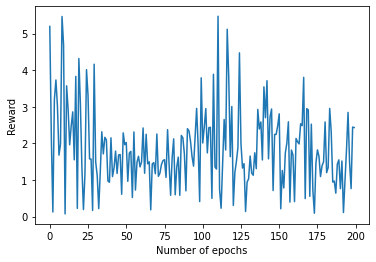

NameError: ignored

In [ ]:
class GameEmulator:
  def __init__(self, epochs, default_reward, reward_func):
    self.epochs = epochs
    self.max_reward = default_reward
    self.overall_reward = []
    self.game = GameEnv("MountainCar-v0")
    states_dim, actions_dim = self.game.get_init_params()
    self.actor = Actor(actions_dim, states_dim[0])
    self.critic = Critic(states_dim[0])
    self.actor_optim = optim.Adam(params=self.actor.parameters(), lr=0.0009)
    self.critic_optim = optim.Adam(params=self.critic.parameters(), lr=0.009)
    self.reward_func = reward_func

  def get_distributed_action(self, state):
    softmax_probs = self.actor(Tensor(state))
    d = distributions.Categorical(probs=softmax_probs)
    return d.sample(), d

  def A_func(self, done, state, prev_state, gamma=0.9):
    return (1 - done) * gamma * self.critic(Tensor(state)) - self.critic(Tensor(prev_state))

  def set_best(self, last_step=-3):
    if self.max_reward < np.mean(self.overall_reward[last_step:]):
      self.max_reward = np.mean(self.overall_reward[last_step:])

  def train_model(self, final_reward=None):
    self.actor.train()
    for i in range(self.epochs):
      print(f"----------- Start {i + 1} train epoch -----------")
      done = False
      epoch_reward = 0
      prev_state = self.game.env_reset()
      while not done:
        action, distribution = self.get_distributed_action(prev_state)
        state, reward, done, _ = self.game.env_step(action.detach().data.numpy())
        reward = reward + self.reward_func(state, prev_state)
        A = reward + self.A_func(done, state, prev_state)
        prev_state = state
        critic_loss = A.pow(2).mean()
        self.critic_optim.zero_grad()
        critic_loss.backward()
        self.critic_optim.step()
        actor_loss = -distribution.log_prob(action) * A.detach()
        self.actor_optim.zero_grad()
        actor_loss.backward()
        self.actor_optim.step()
        epoch_reward += reward
      self.overall_reward.append(epoch_reward)
      self.set_best()
      if final_reward and epoch_reward > final_reward:
        print(f"----------- Model achieve the maximum best result - {epoch_reward} -----------")
        return

      print(f"----------- At the end of {i + 1} epoch reward = {epoch_reward} -----------")
  def play(self):
    self.actor.eval()
    while True:
      state = self.game.env_reset()
      done = False
      while not done:
        action, _ = self.get_distributed_action(state)
        state, _, done, _ = self.game.env_step(action.detach().data.numpy())
        self.game.env_render()
  def plot(self):
    plt.plot([i for i,v in enumerate(self.overall_reward)], self.overall_reward)
    plt.xlabel("Number of epochs")
    plt.ylabel("Reward")
    plt.show()
if __name__ == "__main__":
  def reward_func(s2, s1, accelerator=315):
    return accelerator * (abs(s2[1]) - abs(s1[1]))
  game = GameEmulator(200, -200, reward_func)
  game.train_model()
  game.plot()
  game.play()

In [ ]:
import gym
import numpy as np

class GameEnv:
    def __init__(self, game_name):
        self.__env = gym.make(game_name)
    
    def get_init_params(self):
        return self.__env.observation_space.shape, self.__env.action_space.n

    def env_reset(self):
        return self.__env.reset()
    
    def env_step(self, action):
        return self.__env.step(action)
    
    def env_render(self):
        self.__env.render()

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class Actor(nn.Module):
    def __init__(self, actions_dim, states_dim):
        super().__init__()
        self.fc1 = nn.Linear(states_dim, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, actions_dim)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.softmax(x)


class Critic(nn.Module):
    def __init__(self, states_dim):
        super().__init__()
        self.fc1 = nn.Linear(states_dim, 64)
        self.fc2 = nn.Linear(64, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

----------- Start 1 train epoch -----------


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  from ipykernel import kernelapp as app


----------- At the end of 1 epoch reward = -195.81195169743407 -----------
----------- Start 2 train epoch -----------
----------- At the end of 2 epoch reward = -199.15283692907386 -----------
----------- Start 3 train epoch -----------
----------- At the end of 3 epoch reward = -198.76826044735435 -----------
----------- Start 4 train epoch -----------
----------- At the end of 4 epoch reward = -198.62879855770203 -----------
----------- Start 5 train epoch -----------
----------- At the end of 5 epoch reward = -199.53045423135362 -----------
----------- Start 6 train epoch -----------
----------- At the end of 6 epoch reward = -197.31492349315556 -----------
----------- Start 7 train epoch -----------
----------- At the end of 7 epoch reward = -197.4810157175857 -----------
----------- Start 8 train epoch -----------
----------- At the end of 8 epoch reward = -196.00462411175354 -----------
----------- Start 9 train epoch -----------
----------- At the end of 9 epoch reward = -197.9

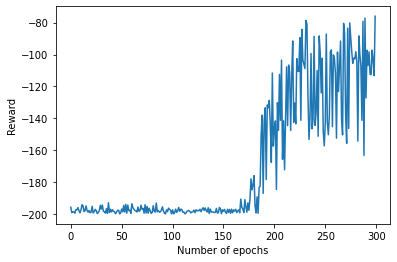

NameError: ignored

In [11]:
class GameEmulator:
  def __init__(self, epochs, default_reward, reward_func):
    self.epochs = epochs
    self.max_reward = default_reward
    self.overall_reward = []
    self.game = GameEnv("MountainCar-v0")
    states_dim, actions_dim = self.game.get_init_params()
    self.actor = Actor(actions_dim, states_dim[0])
    self.critic = Critic(states_dim[0])
    self.actor_optim = optim.Adam(params=self.actor.parameters(), lr=0.001)
    self.critic_optim = optim.Adam(params=self.critic.parameters(), lr=0.001)
    self.reward_func = reward_func

  def get_distributed_action(self, state):
    softmax_probs = self.actor(Tensor(state))
    d = distributions.Categorical(probs=softmax_probs)
    return d.sample(), d

  def A_func(self, done, state, prev_state, gamma=0.9):
    return (1 - done) * gamma * self.critic(Tensor(state)) - self.critic(Tensor(prev_state))

  def set_best(self, last_step=-3):
    if self.max_reward < np.mean(self.overall_reward[last_step:]):
      self.max_reward = np.mean(self.overall_reward[last_step:])

  def train_model(self, final_reward=None):
    self.actor.train()
    for i in range(self.epochs):
      print(f"----------- Start {i + 1} train epoch -----------")
      done = False
      epoch_reward = 0
      prev_state = self.game.env_reset()
      while not done:
        action, distribution = self.get_distributed_action(prev_state)
        state, reward, done, _ = self.game.env_step(action.detach().data.numpy())
        reward = reward + self.reward_func(state, prev_state)
        A = reward + self.A_func(done, state, prev_state)
        prev_state = state
        critic_loss = A.pow(2).mean()
        self.critic_optim.zero_grad()
        critic_loss.backward()
        self.critic_optim.step()
        actor_loss = -distribution.log_prob(action) * A.detach()
        self.actor_optim.zero_grad()
        actor_loss.backward()
        self.actor_optim.step()
        epoch_reward += reward
      self.overall_reward.append(epoch_reward)
      self.set_best()
      if final_reward and epoch_reward > final_reward:
        print(f"----------- Model achieve the maximum best result - {epoch_reward} -----------")
        return

      print(f"----------- At the end of {i + 1} epoch reward = {epoch_reward} -----------")
  def play(self):
    self.actor.eval()
    while True:
      state = self.game.env_reset()
      done = False
      while not done:
        action, _ = self.get_distributed_action(state)
        state, _, done, _ = self.game.env_step(action.detach().data.numpy())
        self.game.env_render()
  def plot(self):
    plt.plot([i for i,v in enumerate(self.overall_reward)], self.overall_reward)
    plt.xlabel("Number of epochs")
    plt.ylabel("Reward")
    plt.show()
if __name__ == "__main__":
  def reward_func(s2, s1, accelerator=315):
    return accelerator * (abs(s2[1]) - abs(s1[1]))
  game = GameEmulator(300, -200, reward_func)
  game.train_model()
  game.plot()
  game.play()